In [1]:
import sys

MAIN_DICT = "/gws/nopw/j04/ai4er/users/pn341/earthquake-predictability"
sys.path.append(MAIN_DICT)

In [2]:
import os
import time
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from utils.load import add_noise, load_data
from utils.params import set_param

warnings.filterwarnings("ignore")

sns.set_theme(style="ticks")
np.random.seed(101)

In [3]:
exp = "p4679"
params = set_param(exp)

dirs = {"main": MAIN_DICT}
dirs["data"] = dirs["main"] + "/data/" + params["dir_data"]

X, Y, t, dt, vl = load_data(exp, dirs, params)

In [4]:
df = pd.DataFrame(
    np.hstack((X, Y, t.reshape(-1, 1))),
    columns=[
        "det_shear_stress",
        "obs_shear_stress",
        "obs_normal_stress",
        "obs_ecdisp",
        "obs_shear_strain",
        "time",
    ],
)
df = df.drop(["obs_shear_strain"], axis=1)
df.head()

,det_shear_stress,obs_shear_stress,obs_normal_stress,obs_ecdisp,time
0,0.057305,5.091520,6.986740,22107.1104,0.000
1,0.056437,5.090652,6.988410,22109.7823,0.001
2,0.055774,5.089989,6.986299,22103.7900,0.002
3,0.055277,5.089492,6.985970,22109.2161,0.003
4,0.054028,5.088243,6.987547,22108.5900,0.004


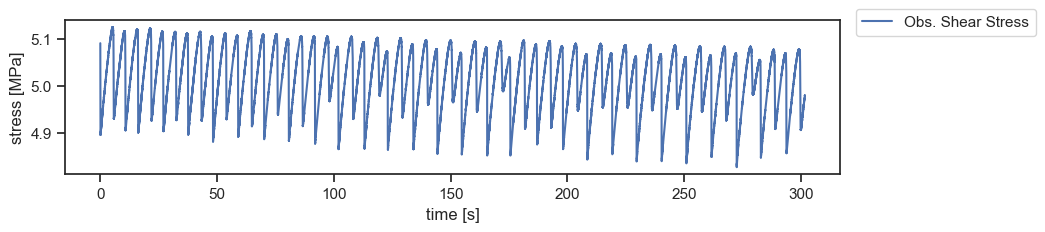

In [20]:
plt.figure(figsize=(10, 2))
plt.plot(df["time"], df["obs_shear_stress"], label="Obs. Shear Stress")
plt.legend(loc=(1.02, 0.9))
plt.xlabel("time [s]")
plt.ylabel("stress [MPa]")
plt.show()

In [ ]:
RATIO = 0.80
LENGTH = df.shape[0]

train_data = df.iloc[: int(RATIO * LENGTH)]
test_data = df.iloc[int(RATIO * LENGTH) :]